<a href="https://colab.research.google.com/github/galettomatias/DS_GALETTO/blob/main/ProyectoDS_ParteI_Apellido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduccion

**Contexto empresarial.** En esta sociedad del consumo la gente cada vez se ve mas necesitada de una gran solvencia economica y aquellos que no pueden cubrirla recurren a prestamos. Es asi que el sistema bancario recibe constantemente solicitudes y debe desarrollar un sistema o modelo que le permita automatizar el saber que solicitante es apto para recibir el credito y cumpla a futuro con los pagos mensuales.
Como nos enfrentamos a un problema de clasificacion binario me voy a basar en la busqueda de patrones similares según cada categoría, para que a fin de cuentas el modelo pueda responder a la pregunta: ¿El cliente entrará en default? (sí, no).


**Problema comercial.**
A partir de los datos, se busca generar visualizaciones que simplifiquen el estado crediticio del solicitante y comparen aquellos que estan en default de los que no.

**Contexto analítico.** Se proporciona un DataFrame que contienen información sobre más de 32.000 registros y 12 variables que cargan los datos de los usuarios del sistema bancario que poseen prestamos vigentes. La finalidad del trabajo seria conocer que variables afectan el estatus de otorgamiento de un préstamo (default o no), y a partir de ello generar un modelo que detecte cuando un cliente entrara potencialmente en default o no. Ademas de responder las siguientes hipotesis y preguntas:


1. ¿Cual es el porcentaje de usuarios segun el estado de su credito?
2. ¿Existe diferencia de ingresos entre los usuarios que cumplen y los que estan en Default?
3. ¿Cual es la distribución de ingresos según las edades de mayor frecuencia?
4. ¿Los años de experiencia laboral influyen en el estado del credito?
5. ¿Cual es el destino de los prestamos? ¿Varia segun el estado crediticio?
6. ¿El tipo de vivienda influye en el estado del credito?


**Variables que presenta:**

person_age = Edad de la persona que pide el prestamo

person_income = Ingreso anual de la persona que pide el prestamo

person_home_ownership = si la persona posee casa, alquila o tiene hipoteca

person_emp_length = cuantos años lleva la persona en su trabajo

loan_intent = destino del prestamo

loan_grade = grado del prestamo

loan_amnt = monto del prestamo otorgado

loan_int_rate = tasa de interes del prestamo

loan_status = Estado del prestamo, 0 es no default, 1 es default

loan_percent_income = cuanto % del ingreso anual del cliente representa el prestamo

cb_person_default_on_file = yes or no, default historico

cb_person_cred_hist_length = longitud de la historia crediticia de la persona


In [ ]:
#importar librearias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importar Dataframe y mostrar las primeras 10 filas:
df_creditos = pd.read_csv ('/content/credit_risk_dataset.csv') #,index_col = 0)
df_creditos.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [ ]:
#Shape o Forma del dataset.
df_creditos.shape

(32581, 12)

In [ ]:
#Tipo de datos en cada columna
df_creditos.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
#Retorna solo las variables numericas, incluye varias estadísticas descriptivas, como la media, la mediana, el máximo, el mínimo, los cuartiles, etc. para cada columna
df_creditos.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# Verificar si hay valores faltantes
df_creditos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Cantidad de filas por columnas
df_creditos.count()

#La duración de las personas en el empleo (person_emp_lenght) y que el interes de los prestamos (loan_int_rate) presentan valores faltantes

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

In [ ]:
#Reviso el total de datos faltantes en las columnas con nulos
df_creditos.isnull().sum()

#se confirma la ausencia de datos de esas dos columnas

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# **Identificacion de los outliers:**
Utilizando graficos boxplots.

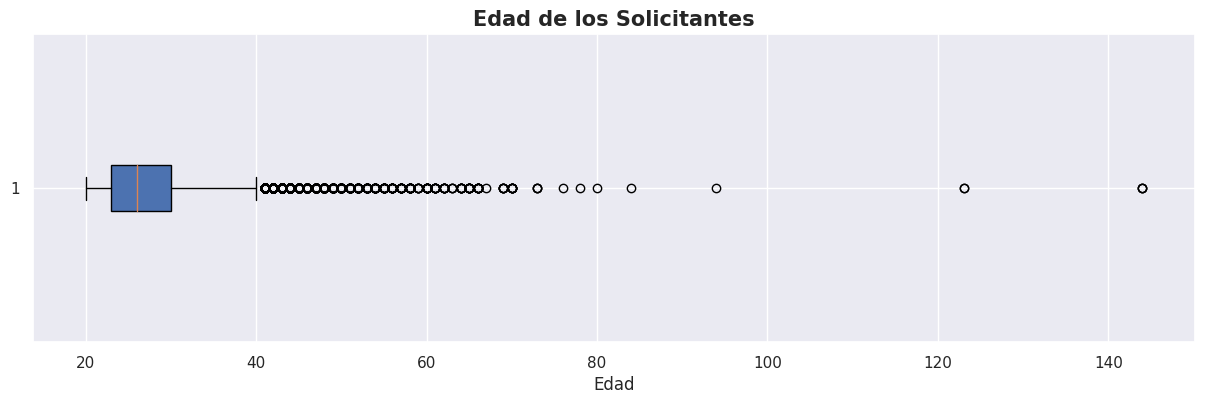

In [ ]:
#Boxplot realizado con Matplotlib
fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot (df_creditos['person_age'],vert=False, patch_artist= True)
#pongo etiquetas:
ax.set_title('Edad de los Solicitantes', fontsize= 15, fontweight= 'bold')
ax.set_xlabel('Edad')
plt.show()

Con el diagrama boxplot se distinguen los outliers, entre ellos valores que no tienen logica como lo son las personas con edades de entre 120 y 140. Para corroborar calculo el valor minimo, maximo y la mediana.

In [ ]:
#Para corroborar los valores calculo la mediana, el valor minimo y maximo
median_age= df_creditos['person_age'].median().round(1)
print ("Mediana: ", median_age)

max_age= df_creditos['person_age'].max() #la persona de mayor edad tiene 144 años
print ("Maximo: ", max_age)

min_age= df_creditos['person_age'].min()
print ("Minimo: ", min_age)

Mediana:  26.0
Maximo:  144
Minimo:  20


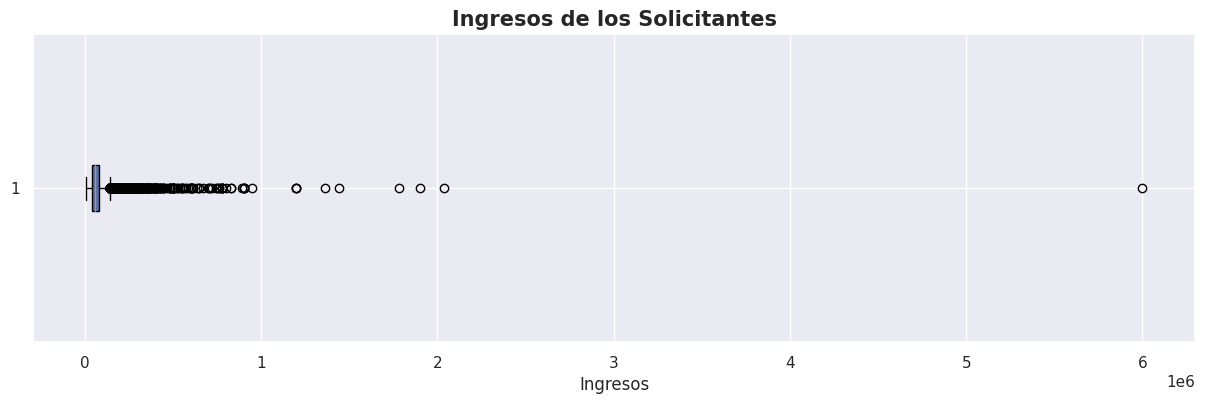

In [ ]:
#Boxplot realizado con Matplotlib
fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot (df_creditos['person_income'],vert=False, patch_artist= True)
#pongo etiquetas:
ax.set_title('Ingresos de los Solicitantes', fontsize= 15, fontweight= 'bold')
ax.set_xlabel('Ingresos')
plt.show()

Un solo usuario presenta una ganancia exagerada en comparacion al resto.

In [ ]:
#Para corroborar los valores calculo la mediana, el valor minimo y maximo

print (df_creditos['person_income'].median().round (1))
print(df_creditos['person_income'].max())
print (df_creditos['person_income'].min())


55000.0
6000000
4000


In [ ]:
#data frame modificado con nuevo limite maximo de ingresos
df_mod = df_mod[df_mod['person_income'] <= 900000]
df_mod['person_income'].max()

800000

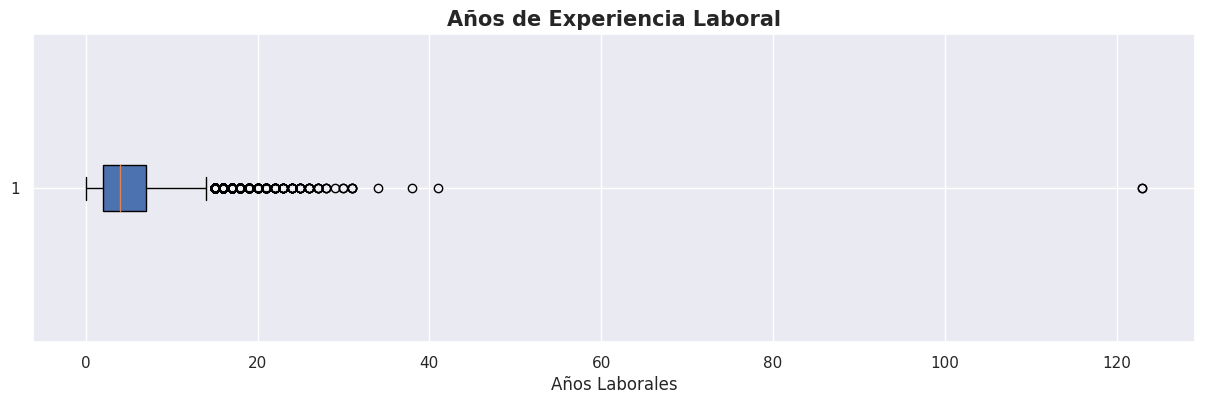

In [ ]:
#Boxplot realizado con Matplotlib
fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot (df_creditos['person_emp_length'],vert=False, patch_artist= True)
#pongo etiquetas:
ax.set_title('Años de Experiencia Laboral', fontsize= 15, fontweight= 'bold')
ax.set_xlabel('Años Laborales')
plt.show()

Nuevamente hay un valor atipico que destaca al referir que un usuario tiene mas de 120 años de experiencia. Para corroborar procedo con los siguientes calculos que nos muestran que l mediana es cercana a los 5 años, el minimo es no tener experiencia y destaca el valor maximo con 123 años.

In [ ]:
#Para corroborar los valores calculo la mediana, el valor minimo y maximo

print (df_creditos['person_emp_length'].median().round (1))
print(df_creditos['person_emp_length'].max())
print (df_creditos['person_emp_length'].min())


4.0
123.0
0.0


# **Análisis Exploratorio de Datos (EDA)**

Procedo a hacer un analisis de los datos con foco en la variable target (loan_status) dado que el objetivo será conocer si un crédito entrará en default o no.

# **Distribucion segun estado del credito**
Muestra el porcentaje de personas que cumplen con el pago y las que no. (0= no default, 1=default).

Analisis general que evalua la cantidad numerica total de usuarios segun estado del credito, el promedio del total y por ultimo distingue entre deudores y no deudores segun rangos etario.

In [ ]:
#Calculo la cantidad segun el estado del credito:
cant_estado= df_creditos['loan_status'].value_counts()
print (cant_estado)
#me quedo con los indices
print (cant_estado.index)

0    25473
1     7108
Name: loan_status, dtype: int64
Int64Index([0, 1], dtype='int64')


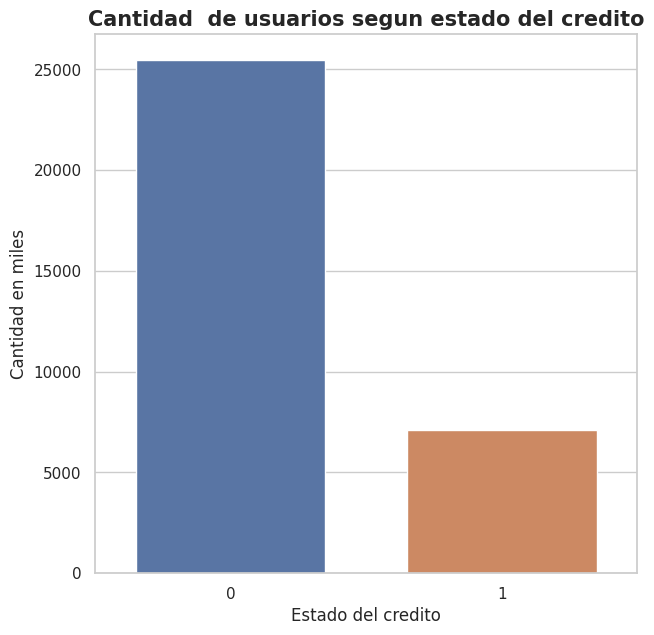

In [ ]:
sns.set_style('whitegrid')  # Establecer un estilo de fondo
#Genero el grafico de barras
fig,ax = plt.subplots(figsize =(7,7))
sns.barplot(x=cant_estado.index, y= cant_estado,  width=0.7)
plt.xlabel('Estado del credito')
plt.ylabel('Cantidad en miles')
plt.title('Cantidad  de usuarios segun estado del credito', fontsize=15,fontweight= 'bold' )

plt.show()

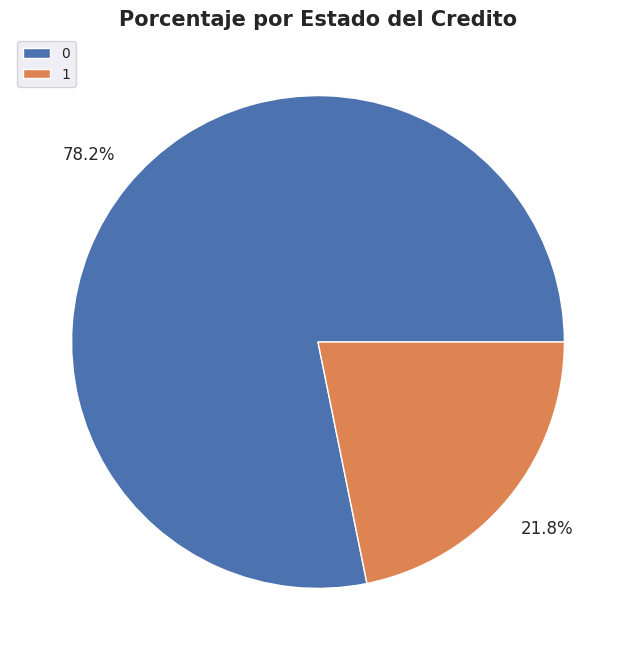

In [ ]:
#me quedo con los valores unicos de la variable con el metodo index:
etiquetass= cant_estado.index
#defino el tamaño de la figura y ax:
fig,ax = plt.subplots(figsize =(8,8))
#le paso esa lista al grafico de torta, convierto los valores a porcentaje con autopct:
plt.pie(cant_estado, autopct='%1.1f%%', pctdistance = 1.2)
plt.legend (loc="upper left",labels= etiquetass ,fontsize=10)
#le pongo un titulo:
ax.set_title('Porcentaje por Estado del Credito', fontsize= 15, fontweight= 'bold')
plt.show()

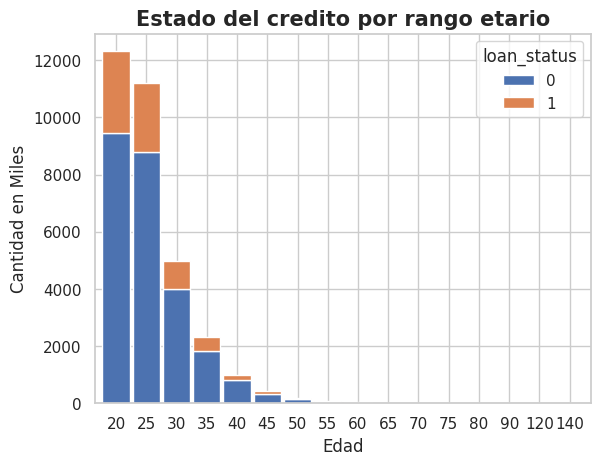

In [ ]:
# Calculo la cantidad de personas segun edad y el estado de su credito usando groupby
estado_edad = df_creditos.groupby(['rango_edad', 'loan_status']).size().unstack()

# Creo el gráfico de barras multivariado con Matplotlib

estado_edad.plot(kind='bar', stacked=True, width=0.9) #uso stack asi quedan los valores apilados

# etiquetas
plt.xlabel('Edad')
plt.ylabel('Cantidad en Miles')
plt.title('Estado del credito por rango etario', fontsize=15,fontweight= 'bold')
plt.xticks(rotation= 360)
# Mostrar el gráfico
plt.show()

Se aprecia que la mayor cantidad de deudores se encuentra entre las edades mas jovenes.

# **¿Existe diferencia de ingresos entre los usuarios que cumplen y los que estan en Default?**
Se genera un boxplot que agrupe segun el estado crediticio y evalue los ingresos generales para cada grupo. Luego para profundizar en el grafico calcule el promedio por grupo y pude notar que hay una gran brecha economica, teniendo mas ganancias aquellos que cumplen a termino con sus pagos y por ende no estan en default.

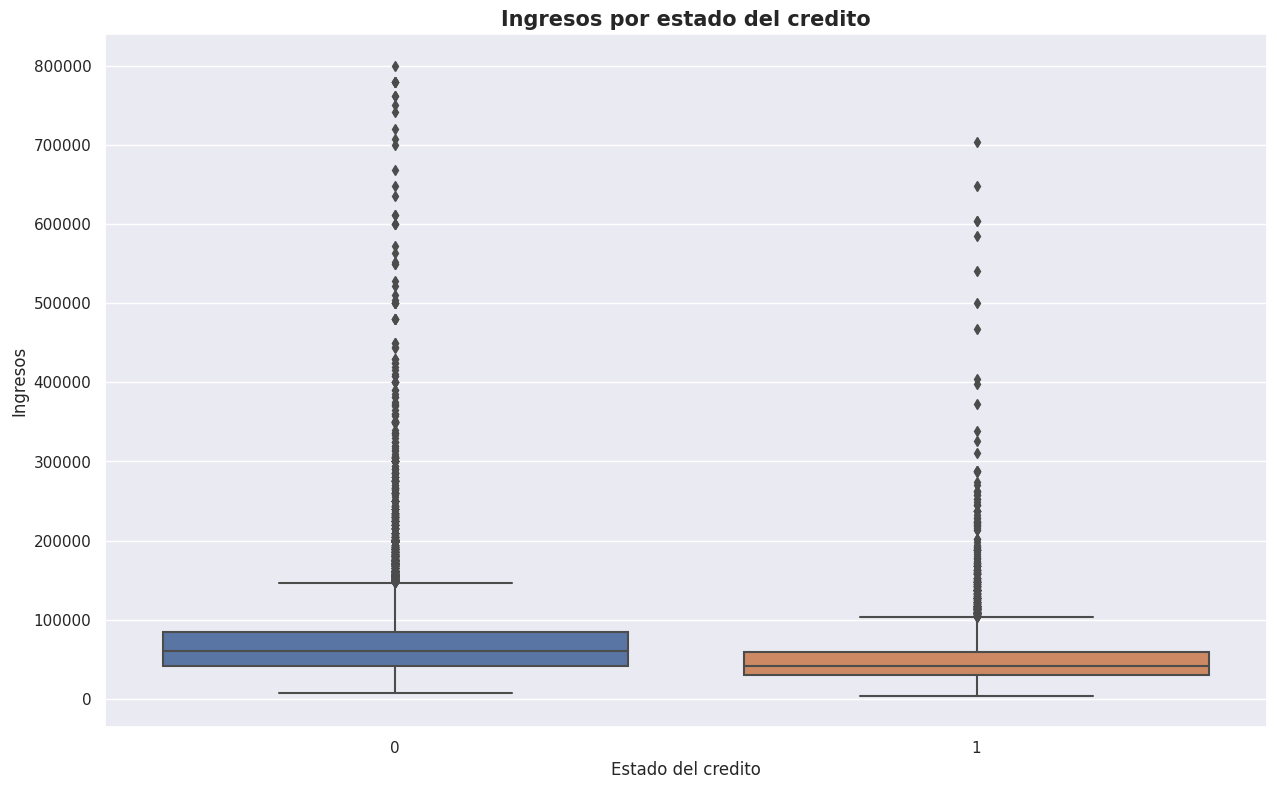

In [ ]:
#BoxPlot con Seaborn
fig,ax = plt.subplots(figsize =(15,9))
sns.boxplot(x='loan_status', y = 'person_income', data = df_mod)
plt.title("Ingresos por estado del credito", fontsize= 15, fontweight= 'bold');
plt.xlabel('Estado del credito')
plt.ylabel('Ingresos')
plt.show()

**Calculo el promedio segun estado del credito**:

In [ ]:
# Calcular el promedio de ingresos segun estado del credito:
prom_no_default = df_mod.loc[df_mod['loan_status'] == 0, 'person_income'].mean().round (1)
prom_default = df_mod.loc[df_mod['loan_status'] == 1, 'person_income'].mean().round (1) #usuarios con estado de crédito en Default
diferencia= (prom_no_default - prom_default).round (1)

# Mostrar el resultado
print("Promedio de ingresos para usuarios que cumplen (0): ",prom_no_default )
print("Promedio de ingresos para usuarios en Default (1): ",prom_default )
print ("Diferencia economica segun promedios: ", diferencia)

Promedio de ingresos para usuarios que cumplen (0):  69843.6
Promedio de ingresos para usuarios en Default (1):  49124.3
Diferencia economica segun promedios:  20719.3


# **Distribución de ingresos según el rango etario**:
Cree una nueva columna agrupando a los usuarios cada 5 años de edad, mostrando en un boxplot general a todos estos rangos de acuerdo a sus ingresos y luego evaluando mas a fondo a las edades con mayor cantidad de usuarios (entre 20 y 40 años).

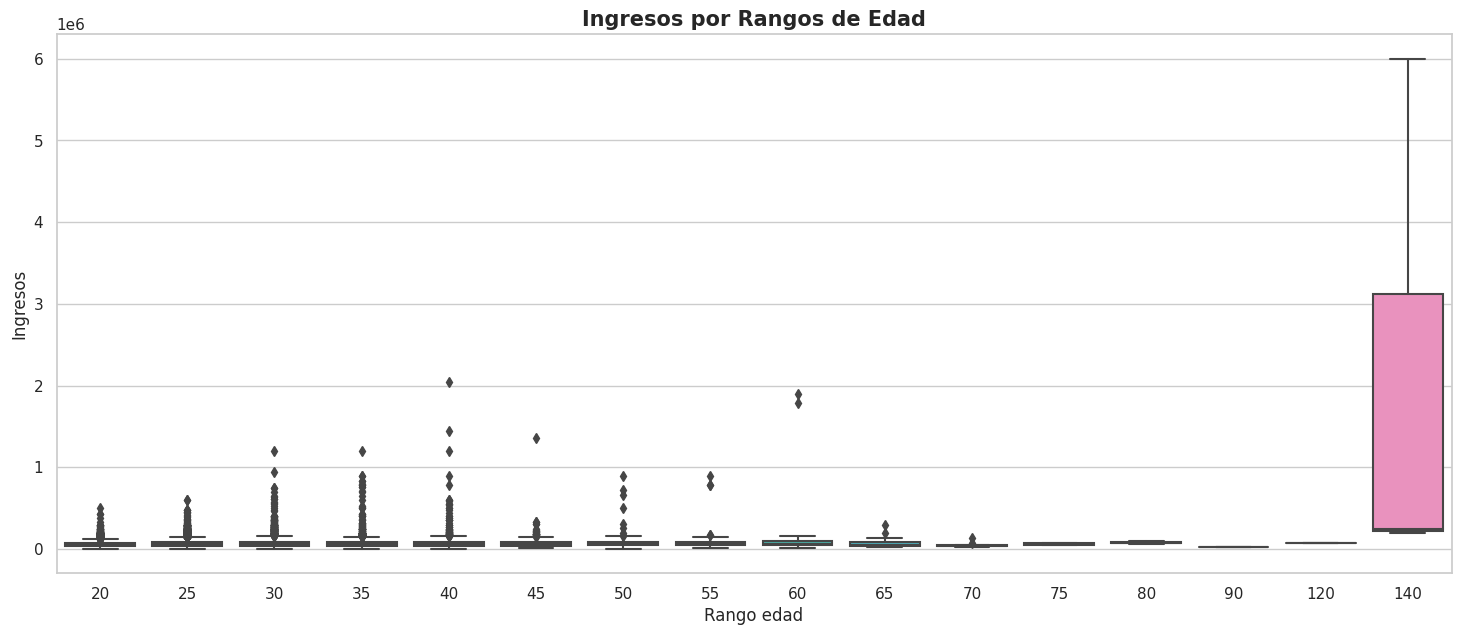

In [ ]:
#genero una nueva columna con los rangos de edades
df_creditos['rango_edad'] = (df_creditos['person_age'] // 5) * 5  #agrupo las edades cada 5 Años

# Ordenar los datos por el grupo de edad
df_creditos =df_creditos.sort_values('rango_edad')
#creo el graficoo
fig,ax = plt.subplots(figsize =(18,7))
sns.boxplot(x='rango_edad', y='person_income', data=df_creditos)

#pongo etiquetas:
plt.title('Ingresos por Rangos de Edad', fontsize= 15, fontweight= 'bold')
plt.xlabel('Rango edad')
plt.ylabel('Ingresos')

plt.show()

**Calculo el promedio segun rango etario**:

In [ ]:
# Calculo el promedio de ingresos para cada rango de edad
prom_ingresos_edad = df_creditos.groupby('rango_edad')['person_income'].mean().round(1)

print(prom_ingresos_edad)

rango_edad
20       57367.6
25       67714.1
30       72895.4
35       74289.1
40       82708.4
45       73869.3
50       84062.9
55       98169.5
60      158084.8
65       78341.5
70       52223.6
75       61500.0
80       79400.0
90       24000.0
120      79002.0
140    2150000.0
Name: person_income, dtype: float64


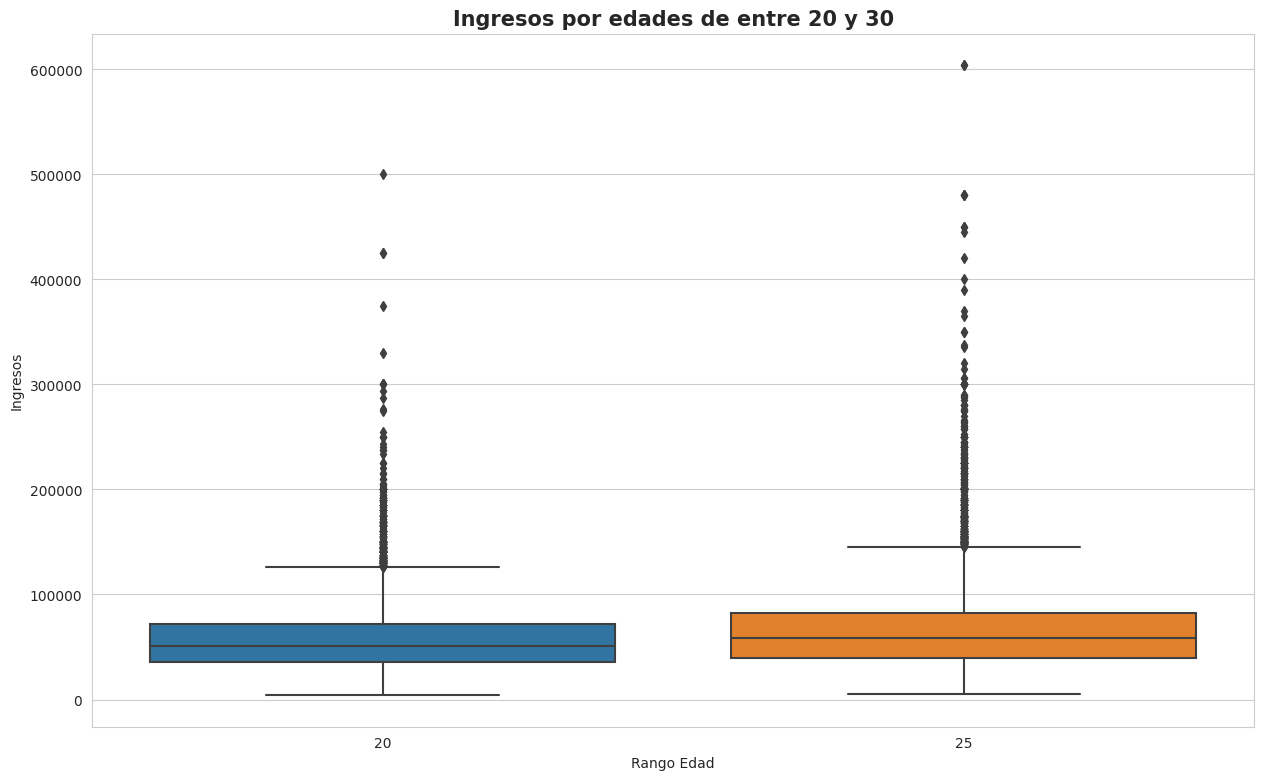

In [ ]:
# genero un limite de edades y lo aplico a una variable
rango_ini= 20
rango_fin = 25
df_limitado = df_creditos[(df_creditos['rango_edad'] >= rango_ini) & (df_creditos['rango_edad'] <= rango_fin)] #utilizo condicionales

# creo el gráfico de boxplot
fig,ax = plt.subplots(figsize =(15,9))
sns.boxplot(x='rango_edad', y='person_income', data=df_limitado)

# etiquetas
plt.title('Ingresos por edades de entre 20 y 30', fontsize=15, fontweight='bold')
plt.xlabel('Rango Edad')
plt.ylabel('Ingresos')

plt.show()

Como se puede ver el promedio de ingresos para el grupo de entre 20 a 25 es de: 57367.6 , mientras que hay usuarios que lo sobrepasan y cobran alrededor de 500000. En el caso del grupo de 25 a 30, el promedio es de 67714.1 con algunos usuarios que superan los 400000 y un usuario que cobra alrededor 600000.


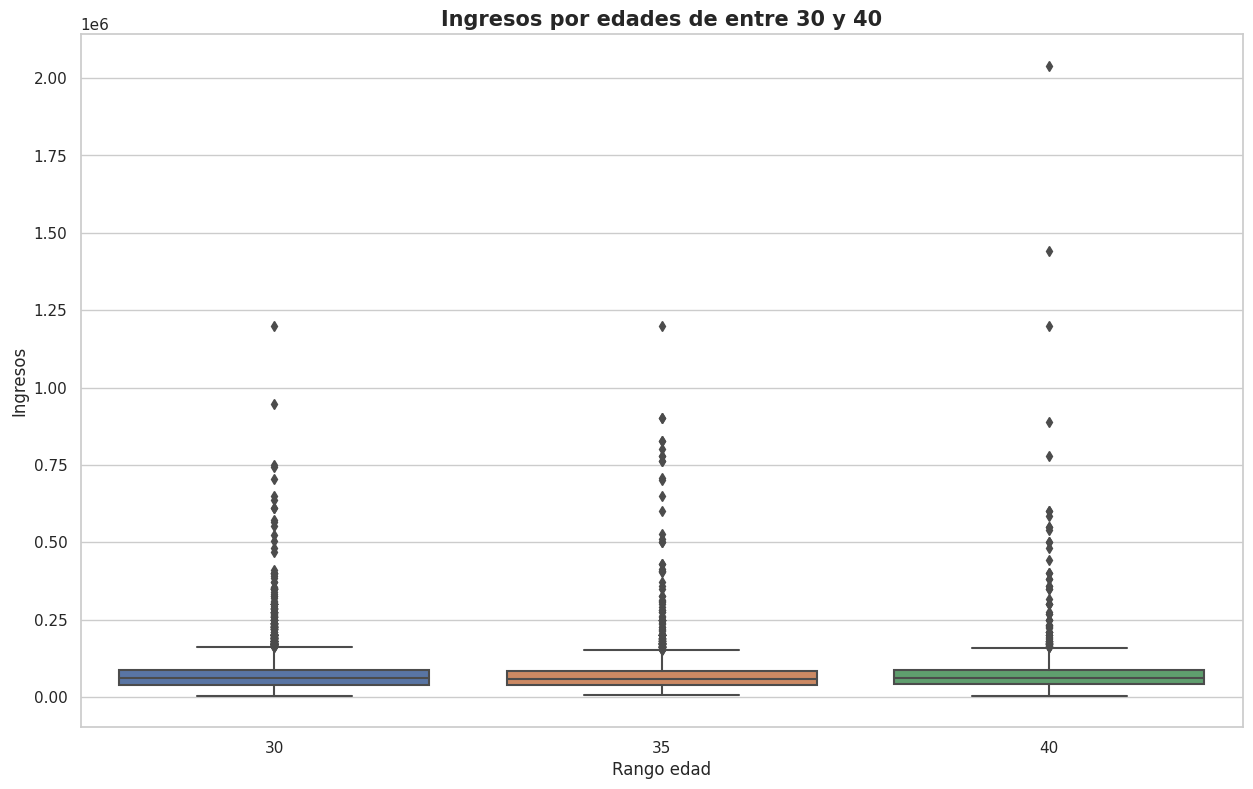

In [ ]:
# genero un limite de edades y lo aplico a una variable
rango_ini= 30
rango_fin = 40
df_limitado = df_creditos[(df_creditos['rango_edad'] >= rango_ini) & (df_creditos['rango_edad'] <= rango_fin)] #utilizo condicionales

# creo el gráfico de boxplot
fig,ax = plt.subplots(figsize =(15,9))
sns.boxplot(x='rango_edad', y='person_income', data=df_limitado)

# etiquetas
plt.title('Ingresos por edades de entre 30 y 40', fontsize=15, fontweight='bold')
plt.xlabel('Rango edad')
plt.ylabel('Ingresos')

plt.show()

En el caso de los rangos 30-35 y 35-40 los promedios de ingresos estan bastante semejantes, con valores de 72895.4 y 74289.1 respectivamente. Mientras que se nota un incremento al llegar al rango de 40-45, con un promedio de 82708.4 y algunos usuarios que lo superan por mucho. Esto me lleva a concluir que a mayor edad es mayor la ganancia, al menos para estos grupos con mayor cantidad de usuarios.

# **¿Los años de experiencia laboral influyen en el estado del credito?**
La experiencia laboral evalua la solidez financiera y la capacidad de pago del solicitante. Se la relaciona con estabilidad laboral y la capacidad de generar ingresos de manera consistente. Al mismo tiempo voy a evaluar el historial crediticio debido a que las personas con una larga experiencia laboral pueden tener un historial crediticio más extenso y estable, lo que puede influir en el estado de su credito.

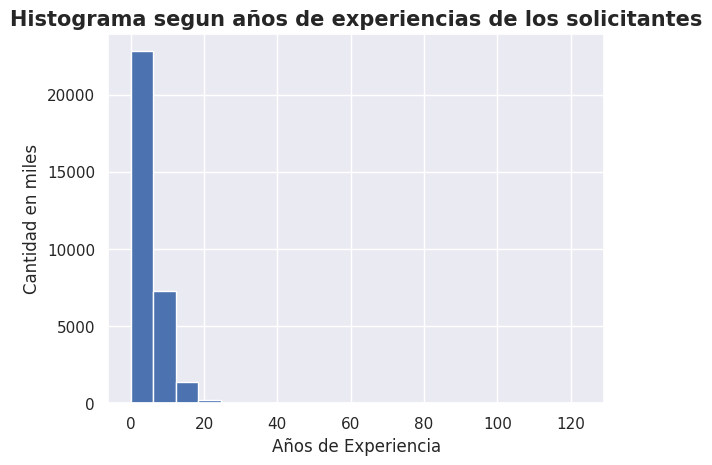

In [ ]:
#creando un histograma de edad con el dataframe modificado
df_creditos['person_emp_length'].hist(bins=20)
# etiquetas
plt.xlabel('Años de Experiencia')
plt.ylabel('Cantidad en miles') #frecuencia
plt.title('Histograma segun años de experiencias de los solicitantes', fontsize= 15, fontweight= 'bold')

plt.show()

In [ ]:
#calculo el promedio de años de experiencia laboral
print (df_creditos['person_emp_length'].mean().round(1))

4.8


Como se puede ver el rango de años de experiencia laboral va dede cero (sin experiencia previa) hasta casi 20 años, teniendo mayor concentracion entre los cero y 10 años. Para tener una orientacion mas precisa calcule el promedio y se estima que alrededor de los 5 años.

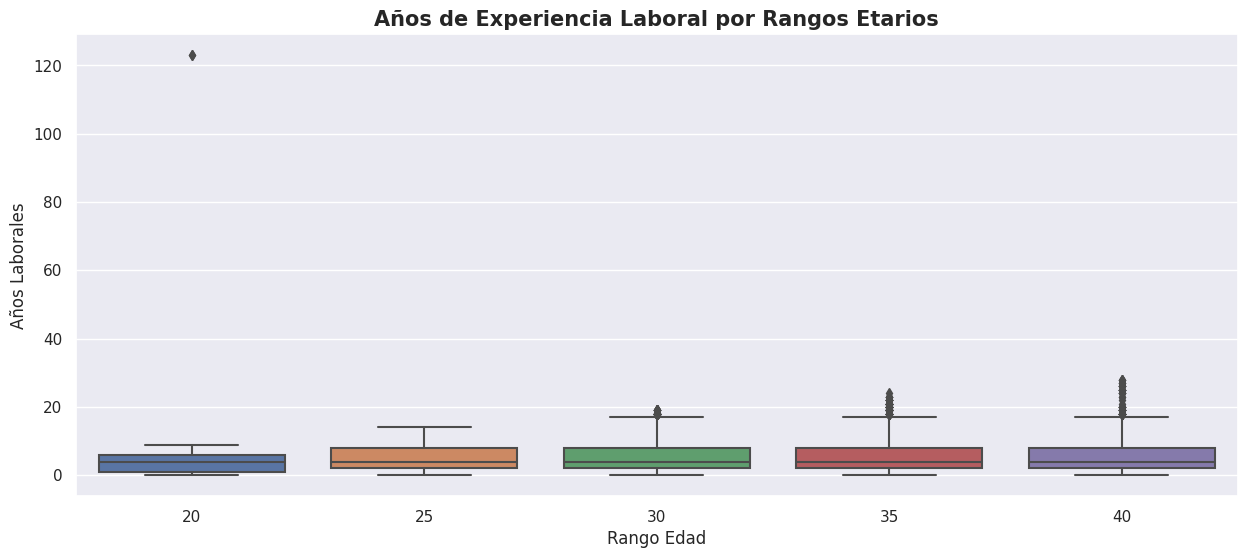

In [ ]:
# genero un limite de edades y lo aplico a una variable
rango_ini= 20
rango_fin = 40
df_limitado = df_creditos[(df_creditos['rango_edad'] >= rango_ini) & (df_creditos['rango_edad'] <= rango_fin)] #utilizo condicionales

# creo el gráfico de boxplot
fig,ax = plt.subplots(figsize =(15,6))
sns.boxplot(x='rango_edad', y='person_emp_length', data=df_limitado)

# etiquetas
plt.title('Años de Experiencia Laboral por Rangos Etarios', fontsize=15, fontweight='bold')
plt.xlabel('Rango Edad')
plt.ylabel('Años Laborales')

plt.show()

In [ ]:
# Calculo el promedio de años de experiencia laboral para cada rango de edad
prom_laboral = df_creditos.groupby('rango_edad')['person_emp_length'].mean().round(1)

print(prom_laboral)

rango_edad
20      3.9
25      5.0
30      5.6
35      5.8
40      6.2
45      6.4
50      5.6
55      6.1
60      5.7
65      5.5
70      1.3
75     32.0
80      4.5
90      1.0
120     4.5
140     6.7
Name: person_emp_length, dtype: float64


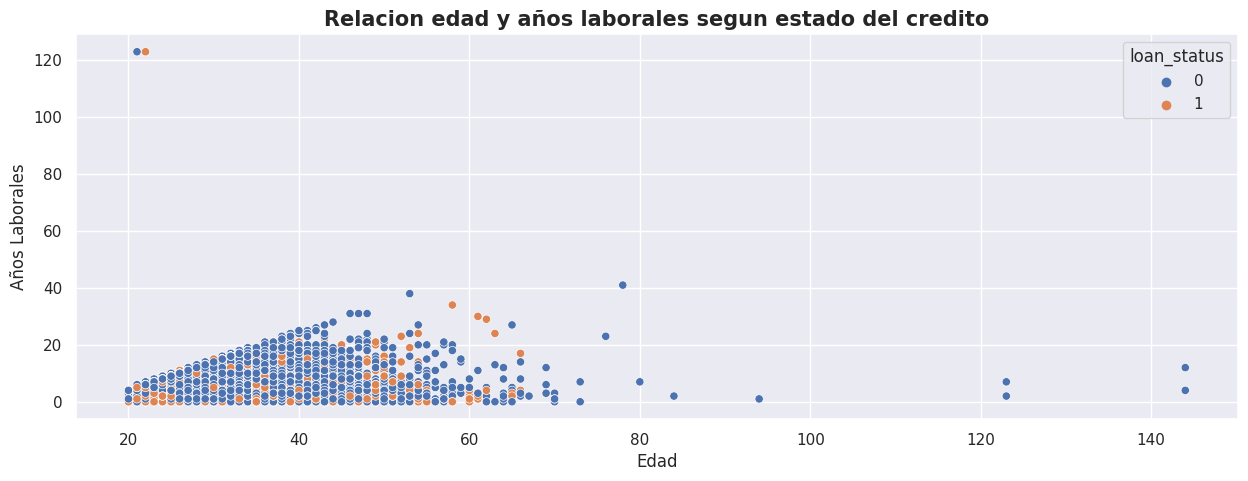

In [ ]:
#Grafico de dispersion con Seaborn  (relaciona edad con años de experiencia laboral)
sns.set(style="darkgrid") #le coloco un estilo
plt.figure(figsize=(15,5))#tamaño del grafico
sns.scatterplot (x="person_age", y="person_emp_length", hue="loan_status", data=df_creditos)

#le coloco las etiquetas
plt.title('Relacion edad y años laborales segun estado del credito', fontsize=15,fontweight= 'bold' )
plt.xlabel('Edad')
plt.ylabel('Años Laborales')

plt.show()

Aca se puede ver que la cantidad de años de experiencia tiene una relacion positiva con la edad del usuario, donde a medida que aumenta la variable "X" (edad), de igual forma incremente la variable dependiente de años de experiencia.
Esto se corrobora con el promedio de años de experiencia segun cada rango etario, donde vemos que el valor incrementa junto con la edad.

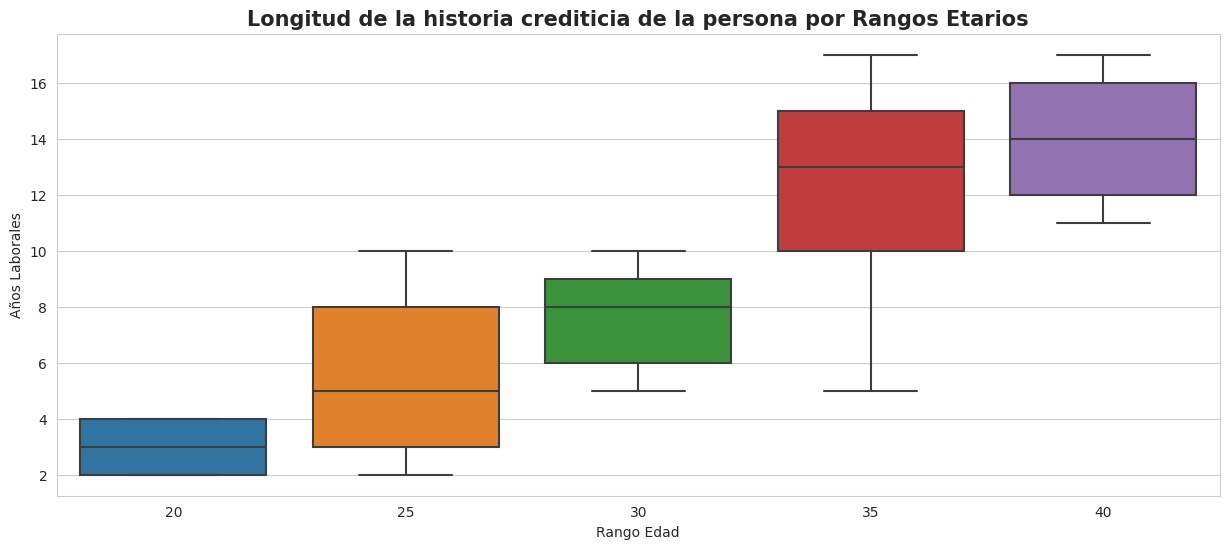

In [ ]:
# genero un limite de edades y lo aplico a una variable
rango_ini= 20
rango_fin = 40
df_limitado = df_creditos[(df_creditos['rango_edad'] >= rango_ini) & (df_creditos['rango_edad'] <= rango_fin)] #utilizo condicionales

# creo el gráfico de boxplot
fig,ax = plt.subplots(figsize =(15,6))
sns.boxplot(x='rango_edad', y='cb_person_cred_hist_length', data=df_limitado)

# etiquetas
plt.title('Longitud de la historia crediticia de la persona por Rangos Etarios', fontsize=15, fontweight='bold')
plt.xlabel('Rango Edad')
plt.ylabel('Años Laborales')

plt.show()

De igual forma a medida que aumenta la edad del solicitante incrementa la cantidad de años de su historial crediticio.

In [ ]:
# Calculo el promedio de años de historia crediticia para cada rango de edad
prom_hist_creditos = df_creditos.groupby('rango_edad')['cb_person_cred_hist_length'].mean().round(1)

print(prom_hist_creditos)

rango_edad
20      3.0
25      5.3
30      7.5
35     12.2
40     14.0
45     13.8
50     20.9
55     23.6
60     24.2
65     24.8
70     23.7
75     25.0
80     24.5
90     27.0
120     3.5
140    10.0
Name: cb_person_cred_hist_length, dtype: float64


# **¿Cual es el destino de los prestamos?**
Muchos de estos creditos son pedidos y otorgados para invertir en una finalidad especifica, es por eso que el banco los clasifica segun la informacion que le propociono el usuario en las siguientes categorias. Evaluandolo segun su estado crediticio. \

In [ ]:
#calcular la finalidad de a donde va el dinero del credito segun el estado de default:
cant_destino = df_creditos.groupby(['loan_intent','loan_status']).size()  #agrupo por las columnas de destino del prestamo y estado del prestamo
print (cant_destino )

loan_intent        loan_status
DEBTCONSOLIDATION  0              3722
                   1              1490
EDUCATION          0              5342
                   1              1111
HOMEIMPROVEMENT    0              2664
                   1               941
MEDICAL            0              4450
                   1              1621
PERSONAL           0              4423
                   1              1098
VENTURE            0              4872
                   1               847
dtype: int64


In [ ]:
#genero un nuevo indice
cant_destino= cant_destino.reset_index()
cant_destino

,loan_intent,loan_status,0
0,DEBTCONSOLIDATION,0,3722
1,DEBTCONSOLIDATION,1,1490
2,EDUCATION,0,5342
3,EDUCATION,1,1111
4,HOMEIMPROVEMENT,0,2664
5,HOMEIMPROVEMENT,1,941
6,MEDICAL,0,4450
7,MEDICAL,1,1621
8,PERSONAL,0,4423
9,PERSONAL,1,1098


In [ ]:
#Reordeno la informacion para que me quede como una tabla mas facil de comprender:
cant_destino= pd.pivot_table (cant_destino, columns ='loan_intent', index= 'loan_status', values= 0 )
cant_destino

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_status,,,,,,
0,3722,5342,2664,4450,4423,4872
1,1490,1111,941,1621,1098,847


<Figure size 1600x800 with 0 Axes>

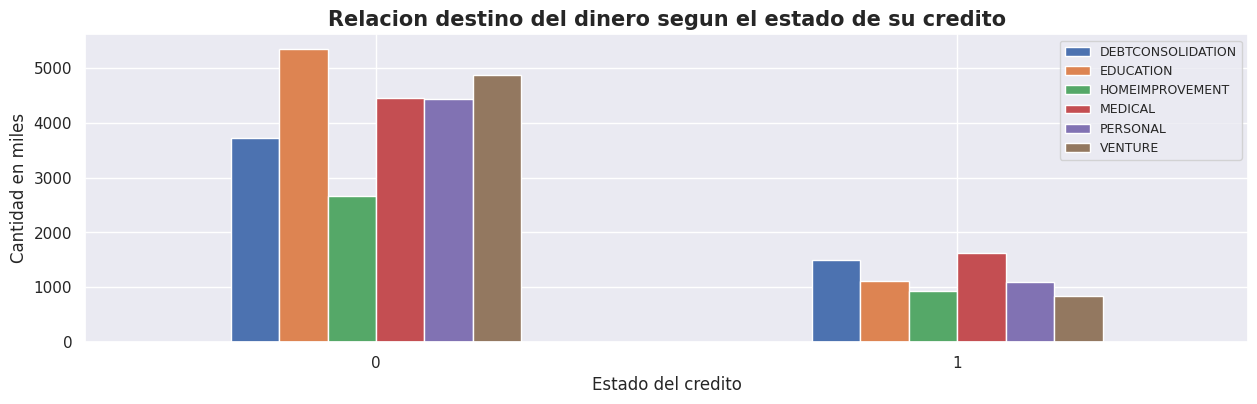

In [ ]:
#Creo el grafico de barras:
plt.figure(figsize=(16, 8))  # Ajustar el tamaño de la figura
cant_destino.plot (kind= 'bar')
plt.xlabel('Estado del credito')
plt.ylabel('Cantidad en miles')
plt.title('Relacion destino del dinero segun el estado de su credito', fontsize=15,fontweight= 'bold' )
plt.legend (loc="upper right" ,fontsize=9)
plt.xticks(rotation= 360) #roto las etiquetas que indican el estdo default
plt.show()

Como se puede ver entre los usuarios libres de deudas predominan la educacion (se entiende debido a la gran frecuencia de usuarios jovenes), los emprendimientos (como invertir en empresas) y estan parejos el bloque de salud y cuetiones personales. Encambio, entre los deudores predominan la inversion en cuestiones medicas/salud y consolidacion de deuda (lo que deja claro que estos usuarios ya estuvieron previamente en una situacion de default).  

# **¿El tipo de vivienda influye en el estado del credito?**
Se agrupa segun el estado de vivienda que declara la persona

In [ ]:
#Calculo la cantidad de personas segun el tipo de vivienda que poseen:
df_creditos['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

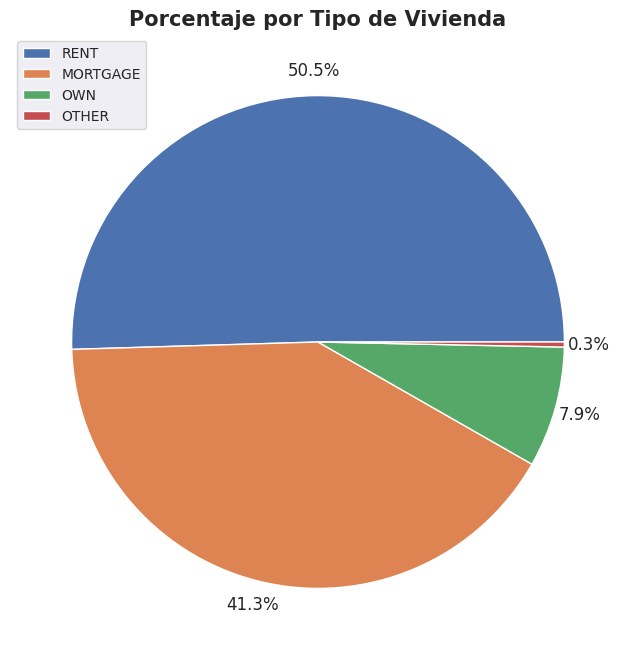

In [ ]:
#pongo el conteo en una variable:
cant_vivienda= df_creditos['person_home_ownership'].value_counts()
#me quedo con los valores unicos de la variable con el metodo index:
etiquetas= cant_vivienda.index
#defino el tamaño de la figura y ax:
fig,ax = plt.subplots(figsize =(8,8))
#le paso esa lista al grafico de torta, convierto los valores a porcentaje con autopct:
plt.pie(cant_vivienda, autopct='%1.1f%%', pctdistance = 1.1)
plt.legend (loc="upper left",labels= etiquetas ,fontsize=10)
#le pongo un titulo:
ax.set_title('Porcentaje por Tipo de Vivienda', fontsize= 15, fontweight= 'bold')
plt.show()

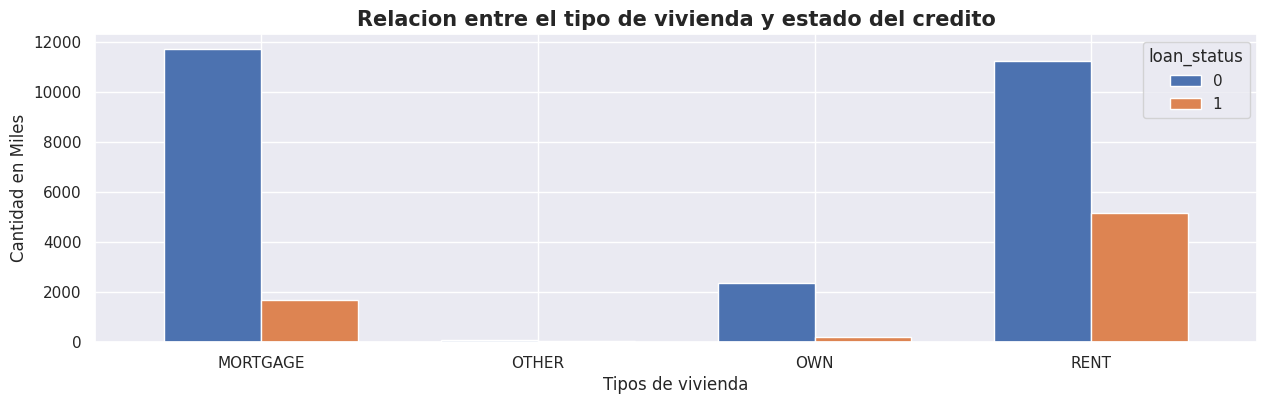

In [ ]:
# Calculo la cantidad de personas segun edad y el estado de su credito usando groupby
estado_vivienda = df_mod.groupby(['person_home_ownership', 'loan_status']).size().unstack()

# Creo el gráfico de barras multivariado con Matplotlib
estado_vivienda.plot(kind='bar', width=0.7) #, stacked=True #uso stack asi quedan los valores apilados

# etiquetas
plt.xlabel('Tipos de vivienda')
plt.ylabel('Cantidad en Miles')
plt.title('Relacion entre el tipo de vivienda y estado del credito', fontsize=15,fontweight= 'bold')
plt.xticks(rotation= 360)
# Mostrar el gráfico
plt.show()

Como se puede ver la mayoria de los que piden creditos no poseen casa propia.Más del 50% de los clientes alquila su vivienda. Un 41% esta pagando una hipoteca, y solo un 8% es dueño.
Donde las personas que alquilan son las que mas deudores presentan, capaz porque parte de sus ingresos se va en pagar la renta. Seguidos por aquellos que tienen la casa hipotecada.
Eso nos puede llevar a pensar que piden el credito, en parte, porque su sueldo no les es suficiente para poder comprar una propiedad y menos saldar sus hipotecas.

**CONCLUSIONES E HIPOTESIS**

Tras los distintos tipos de análisis aplicados, por ahora pude concluir:

- Aproximadamente, el 78% de las personas mantiene sus créditos al día y el 22% presenta algún tipo de deuda (default).

- El destino de los créditos es bastante parejo, pero se destacan principalmente educación, cuestiones médicas y emprendimiento.

- Las personas que destinan su credito a tratamientos medicos (loan_intent) son aquellas que presentan mayor cantidad de deudores, capaz porque no tienen seguro medico y piden prestamos para saldar sus tratmientos.

- La edad media de los clientes es 27-28 años, lo cual tiene lógica dado que el mayor destino de los préstamos es educación. Esto exhibe una distribucion asimetrica.

- Más del 50% de los clientes alquila su vivienda. Un 41% esta pagando una hipoteca, y solo un 8% es dueño.Donde las personas que alquilan son las que mas deudores presentan, capaz porque parte de sus ingresos se va en pagar la renta.

- La mayor cantidad de clientes deudores son jóvenes. Tiene sentido dado que hay una tendencia donde a mayor edad, mayor ingreso anual.